In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)
import tensorflow as tf
import scipy.io
import numpy as np

from config import Config
from Model.Auto_encoder import Auto_encoder as Model
from Testing.Interpolate import Interpol
from Testing import utils
import mywarper

In [2]:
class TempConfig(Config):
    NAME = "Face Auto Encoder"
    SUMMARY = False
    SAVE = False

In [3]:
# Create a global configuration object
config = TempConfig()
## Specify the trained weights localtion
save_dir = os.path.join(root_dir, "Training/Weight")  # Folder that saves the trained weights
Run = None
epoch = None
interpol = Interpol(config, save_dir)

## Read in the statistics

In [4]:
mdict = scipy.io.loadmat("latent_statistics.mat")
im_mean = mdict["im_mean"]
im_range = mdict["im_range"]
im_idx = mdict["im_idx"]
lm_mean = mdict["lm_mean"]
lm_range = mdict["lm_range"]
lm_idx = mdict["lm_idx"]

## Apperance Interpolation

In [5]:
num_image = 10
lm_batch = np.repeat(lm_mean, num_image, axis = 0)

In [107]:
for k in range(4):
    im_batch = np.repeat(im_mean, num_image, axis = 0)
    line_step = np.linspace(im_range[1][k], im_range[0][k], num = num_image)
    im_batch[:, im_idx[0][k]] = line_step
    output = interpol.interpol(Model, im_batch, lm_batch, dir_names=Run, epoch=epoch)
    if k == 0:
        final_im = output[0]
    else:
        final_im = np.concatenate([final_im, output[0]], axis = 0)

INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt
INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt
INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt
INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt


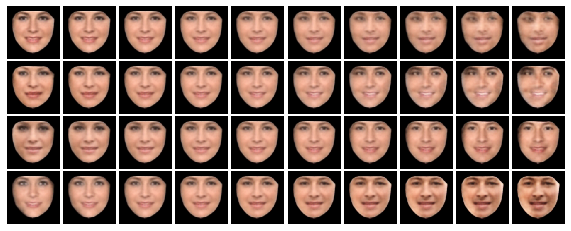

In [108]:
fig_interpol = utils.plot(final_im, 4, 10, 3, 128, 128)
fig_interpol.savefig("3_40_interpolate_app_faces.png")

## Geometry Interpolation

In [43]:
num_image = 10
im_batch = np.repeat(im_mean, num_image, axis = 0)

In [44]:
for k in range(2):
    lm_batch = np.repeat(lm_mean, num_image, axis = 0)
    line_step = np.linspace(lm_range[1][k], lm_range[0][k], num = num_image)
    lm_batch[:, lm_idx[0][k]] = line_step
    output = interpol.interpol(Model, im_batch, lm_batch, dir_names=Run, epoch=epoch)
    if k == 0:
        final_lm = output[1]
        final_im = output[0]
    else:
        final_lm = np.concatenate([final_lm, output[1]], axis = 0)
        final_im = np.concatenate([final_im, output[0]], axis = 0)

INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt
INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt


In [45]:
final_lm.shape

(20, 136)

## Read in the mean warping

In [46]:
mdict = scipy.io.loadmat("PCA_eigen_mean_warping.mat")
mean_LM = mdict["mean_warping"]
Mean_LM = mean_LM.reshape(68, 2)

## Warping back

In [47]:
im = final_im.reshape((final_im.shape[0], 128, 128, 3))
target_lm = final_lm.reshape((final_lm.shape[0], 68, 2))

In [48]:
for i in range(final_im.shape[0]):
    warping = mywarper.warp(im[i, :, :, :], Mean_LM, target_lm[i, :, :] * 128)
    if i == 0:
        Final_im = np.expand_dims(warping, axis = 0)
    else:
        Final_im = np.concatenate([Final_im, np.expand_dims(warping, axis = 0)], axis = 0)

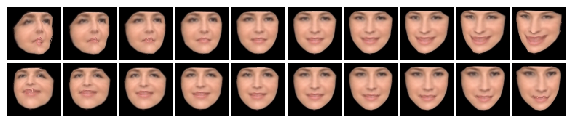

In [50]:
fig_interpol = utils.plot(Final_im, 2, 10, 3, 128, 128)
fig_interpol.savefig("3_20_interpolate_geo_faces.png")